# 一个完整的神经网络模型

Epoch 100/1000, Loss: 0.3896
Epoch 200/1000, Loss: 0.2055
Epoch 300/1000, Loss: 0.1366
Epoch 400/1000, Loss: 0.1041
Epoch 500/1000, Loss: 0.0849
Epoch 600/1000, Loss: 0.0719
Epoch 700/1000, Loss: 0.0626
Epoch 800/1000, Loss: 0.0554
Epoch 900/1000, Loss: 0.0500
Epoch 1000/1000, Loss: 0.0454


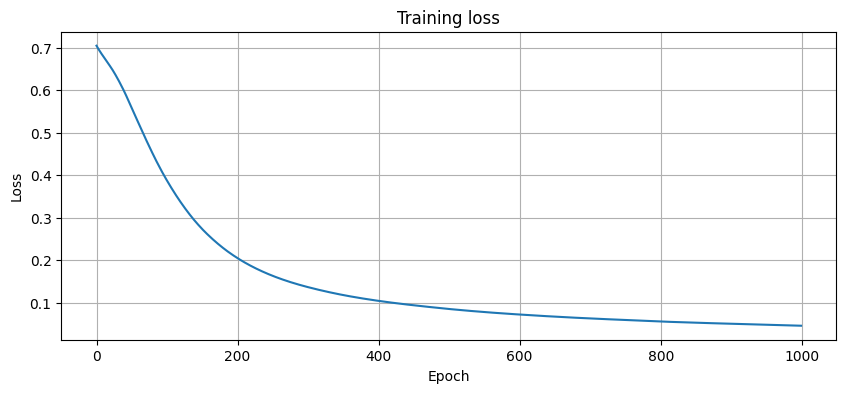

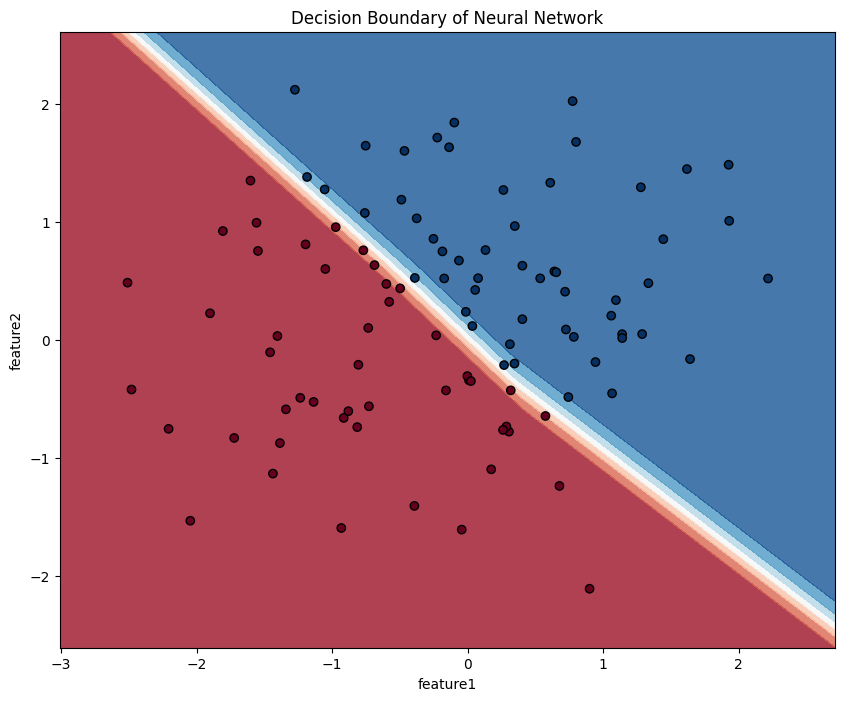

In [4]:
import numpy as np  # 导入NumPy库，用于科学计算和数组操作
import torch  # 导入PyTorch库，用于构建和训练神经网络

import matplotlib.pyplot as plt  # 导入matplotlib库，用于数据可视化
import torch.nn as nn  # 导入神经网络模块，提供构建神经网络的组件
import torch.optim as optim  # 导入优化器模块，提供各种优化算法

# 设置随机种子以保证结果可复现
torch.manual_seed(42)  # 设置PyTorch的随机种子
np.random.seed(42)  # 设置NumPy的随机种子

# 1. 创建一个简单的数据集（二分类问题）
X_train = torch.randn(100, 2)  # 生成100个样本，每个有2个特征的随机数据
# 创建标签：如果x1+x2>0，则为1，否则为0（创建一个线性可分的数据集）
# unsqueeze(1)将形状为[100]的张量变为[100,1]，方便后续计算损失
y_train = torch.unsqueeze((X_train[:, 0] + X_train[:, 1] > 0).float(), 1)  # 增加维度使形状为[100,1]
#X_train[:, 0] + X_train[:, 1] > 0,对X_train的第一列和第二列求和，然后检查是否大于0,结果是一个形状为[100]的布尔类型张量
#将布尔值转换为浮点数（True→1.0, False→0.0）,结果仍是形状为[100]的一维张量
#在索引1处（即第二个维度）添加一个新维度,将形状从[100]变为[100, 1]

# 2. 定义神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        """初始化神经网络的层和激活函数"""
        super(SimpleNN, self).__init__()  # 调用父类的初始化方法
        self.layer1 = nn.Linear(2, 5)  # 输入层到隐藏层（2个输入特征，5个隐藏神经元）
        self.activation1 = nn.ReLU()    # ReLU激活函数：max(0,x)
        self.layer2 = nn.Linear(5, 1)   # 隐藏层到输出层（5个输入，1个输出）
        self.activation2 = nn.Sigmoid()  # Sigmoid激活函数：将输出压缩到(0,1)区间，适合二分类
    
    def forward(self, x):
        """定义前向传播过程"""
        x = self.layer1(x)  # 第一层线性变换
        x = self.activation1(x)  # 应用ReLU激活函数
        x = self.layer2(x)  # 第二层线性变换
        x = self.activation2(x)  # 应用Sigmoid激活函数
        return x  # 返回模型预测结果

# 3. 实例化模型、损失函数和优化器
model = SimpleNN()  # 创建神经网络模型实例
criterion = nn.BCELoss()  # 二元交叉熵损失函数，适用于二分类问题
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 随机梯度下降优化器，学习率为0.1

# 4. 训练模型
epochs = 1000  # 设置训练的总轮数
losses = []  # 初始化列表用于存储每轮的损失值

for epoch in range(epochs):
    # 前向传播
    outputs = model(X_train)  # 将输入数据传入模型得到预测结果
    loss = criterion(outputs, y_train)  # 计算预测结果与真实标签之间的损失
    losses.append(loss.item())  # 记录当前轮次的损失值
    
    # 反向传播
    optimizer.zero_grad()  # 清除之前的梯度，防止梯度累积
    loss.backward()        # 计算梯度：损失对各参数的导数
    optimizer.step()       # 更新参数：参数 = 参数 - 学习率 * 梯度
    
    # 每100个epoch打印一次损失
    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# 5. 可视化训练过程
plt.figure(figsize=(10, 4))  # 创建图形，设置大小
plt.plot(losses)  # 绘制损失随训练轮次的变化曲线
plt.title('Training loss')  # 设置图标题
plt.xlabel('Epoch')  # 设置x轴标签
plt.ylabel('Loss')  # 设置y轴标签
plt.grid(True)  # 显示网格线
plt.show()  # 显示图形

# 6. 可视化决策边界
with torch.no_grad():  # 禁用梯度计算，提高计算效率和减少内存使用
    # 创建网格以可视化决策边界
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5  # 设置x轴范围
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5  # 设置y轴范围
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))  # 创建网格点坐标矩阵
    
    # 预测每个网格点的类别
    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))  # 将网格点传入模型进行预测
    Z = Z.reshape(xx.shape)  # 将预测结果重塑为网格形状
    
    # 绘制决策边界和数据点
    plt.figure(figsize=(10, 8))  # 创建图形，设置大小
    plt.contourf(xx, yy, Z.numpy(), alpha=0.8, cmap=plt.cm.RdBu)  # 绘制填充等高线图表示决策边界
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], cmap=plt.cm.RdBu, edgecolors='k')  # 绘制数据点
    plt.title('Decision Boundary of Neural Network')  # 设置图标题
    plt.xlabel('feature1')  # 设置x轴标签
    plt.ylabel('feature2')  # 设置y轴标签
    plt.show()  # 显示图形
    

## Sigmoid函数的作用


Sigmoid函数是一个S形曲线函数，数学表达式为：$\sigma(x) = \frac{1}{1 + e^{-x}}$，在深度学习和神经网络中有多种重要作用：

### 主要功能

1. **压缩输出至(0,1)区间**
   - 无论输入值多大或多小，Sigmoid的输出总是被限制在0到1之间
   - 这使它特别适合表示概率值或二分类问题的输出

2. **引入非线性**
   - 将线性变换后的数据映射为非线性输出
   - 没有非线性激活函数，多层神经网络会退化为单层线性模型

3. **二分类决策**
   - 在代码中作为二分类模型的最终输出层：`self.activation2 = nn.Sigmoid()`
   - 输出可以直接解释为样本属于正类的概率

### Sigmoid函数特性

- **平滑可导**：在整个定义域内处处可导，导数为$\sigma'(x) = \sigma(x)(1-\sigma(x))$
- **对称性**：围绕点(0,0.5)中心对称
- **饱和特性**：当输入值很大或很小时，输出会接近1或0，且梯度接近0

### 在示例代码中的应用

在提供的代码中，Sigmoid函数被用在网络的输出层，将神经网络的原始输出转换为0到1之间的值，这正好适合二分类问题的概率表示：



In [ ]:
def forward(self, x):
    x = self.layer1(x)     # 第一层线性变换
    x = self.activation1(x)  # ReLU激活
    x = self.layer2(x)     # 第二层线性变换
    x = self.activation2(x)  # Sigmoid激活 - 将输出压缩到(0,1)区间
    return x


### 局限性

尽管Sigmoid在二分类输出层很有用，但在深度网络的隐藏层中已较少使用，主要原因是：
- 容易导致梯度消失问题（当输入绝对值较大时）
- 输出不以零为中心
- 计算指数函数较为耗时

在现代神经网络中，隐藏层通常使用ReLU等其他激活函数，而Sigmoid主要保留在二分类问题的输出层使用。

## 层的概念

输入层和输出层之间的层被称为隐藏层，层与层之间的连接密度和类型构成了网络的配置。
神经网络由多个层组成，包括：

- **输入层 (Input Layer)**：接收原始输入数据。
- **隐藏层 (Hidden Layer)**：对输入数据进行处理，可以有多个隐藏层。
- **输出层 (Output Layer)**：产生最终的输出结果。

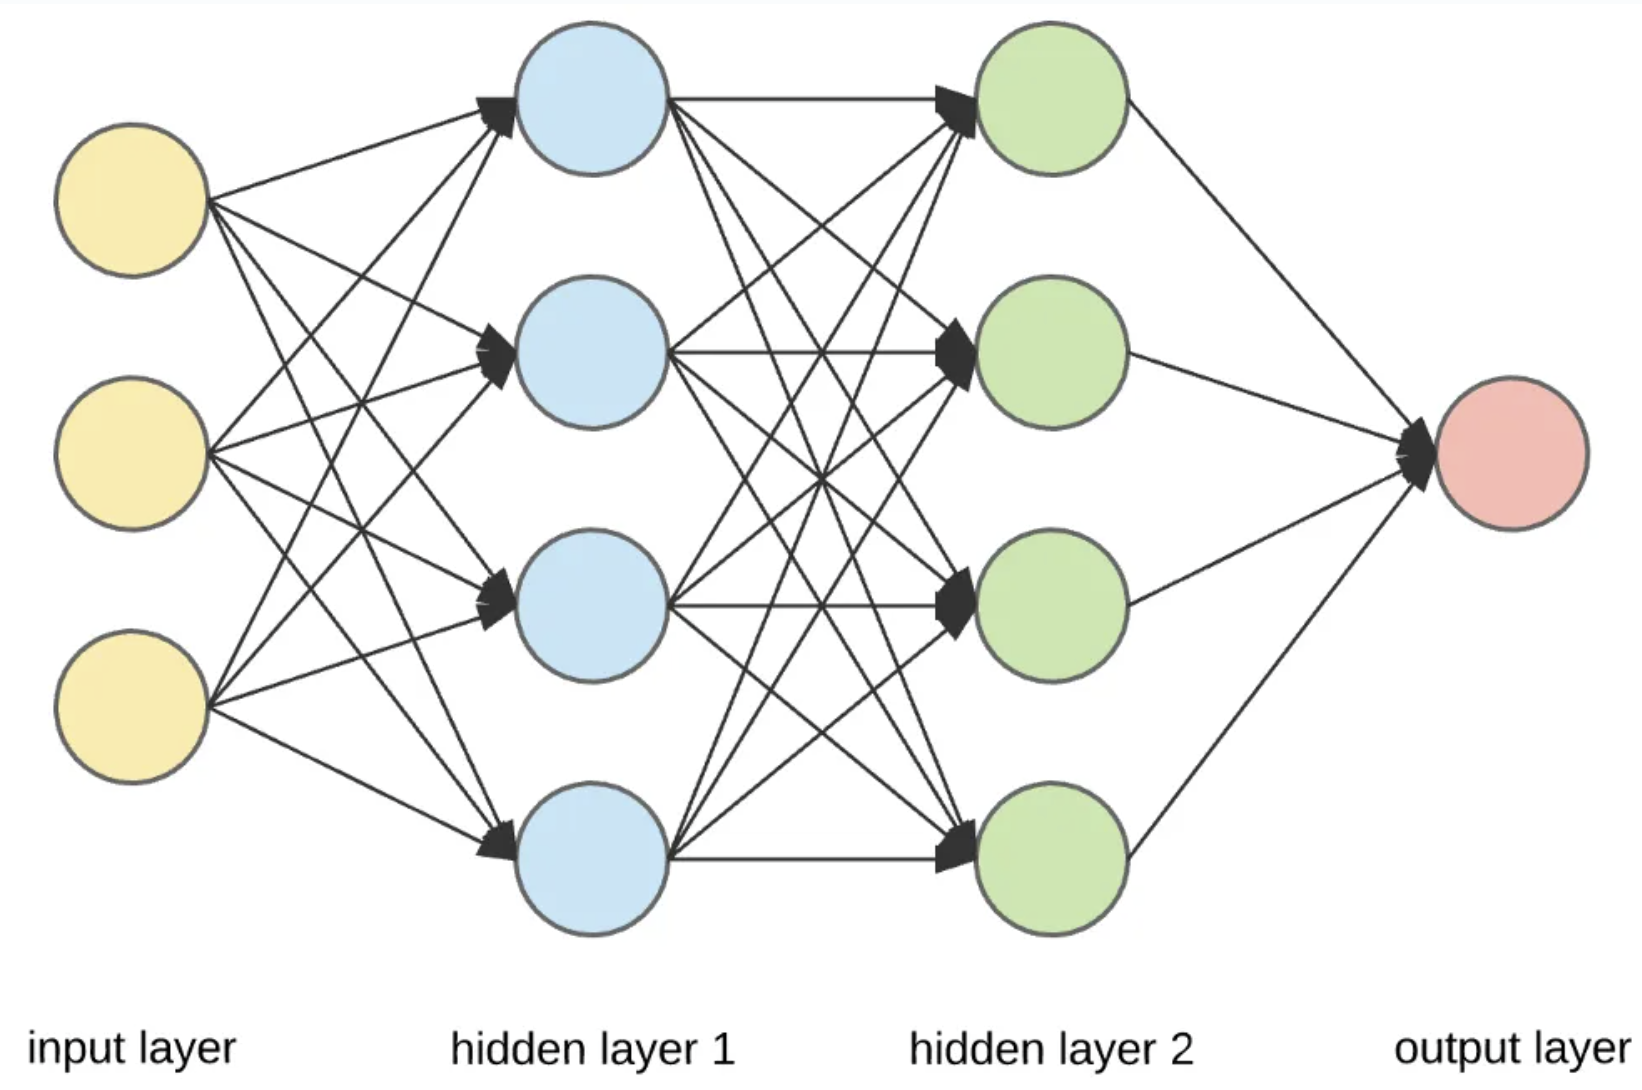

## 前馈神经网络(FNN)

前馈神经网络的基本结构：

- **输入层**：数据进入网络的入口点。输入层的每个节点代表一个输入特征。
- **隐藏层**：一个或多个层，用于捕获数据的非线性特征。每个隐藏层由多个神经元组成，每个神经元通过激活函数增加非线性能量。
- **输出层**：输出网络的预测结果。节点数和问题类型相关，例如分类问题的输出节点数等于类别数。
- **连接权重与偏置**：每个神经元的输入通过权重进行加权求和，并加上偏置值，然后通过激活函数传递。

## 循环神经网络(RNN)

循环神经网络（Recurrent Neural Network, RNN）是一类专门处理序列数据的神经网络，能够捕获输入数据中时间或顺序信息的依赖关系。

RNN 的特别之处在于它具有"记忆能力"，可以在网络的隐藏状态中保存之前时间步的信息。

循环神经网络用于处理随时间变化的数据模式。

在 RNN 中，相同的层被用来接收输入参数，并在指定的神经网络中显示输出参数。

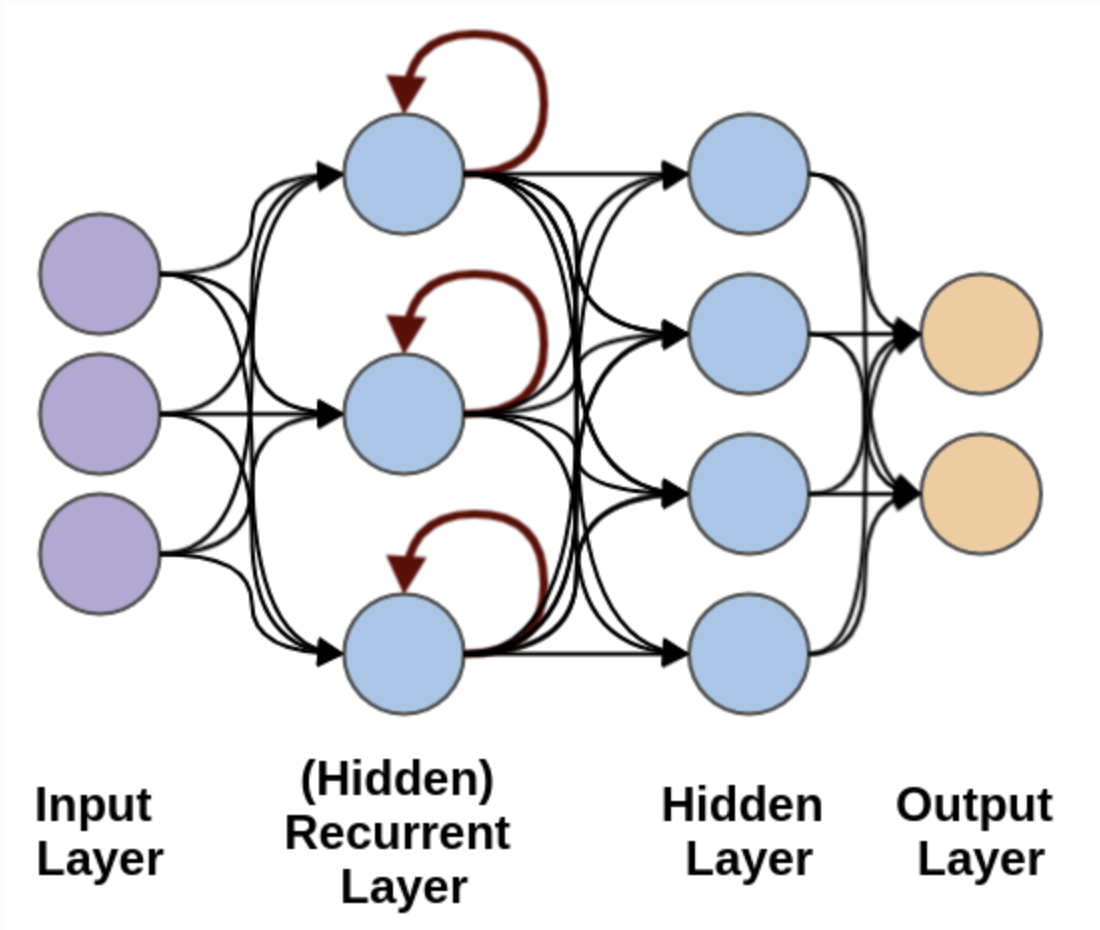

nn.Module 是所有神经网络模块的基类，你需要定义以下两个部分：

- **`__init__()`**：定义网络层。
- **`forward()`**：定义数据的前向传播过程。

PyTorch 提供了许多常见的神经网络层，以下是几个常见的：

- `nn.Linear(in_features, out_features)`：全连接层，输入 `in_features` 个特征，输出 `out_features` 个特征。
- `nn.Conv2d(in_channels, out_channels, kernel_size)`：2D 卷积层，用于图像处理。
- `nn.MaxPool2d(kernel_size)`：2D 最大池化层，用于降维。
- `nn.ReLU()`：ReLU 激活函数，常用于隐藏层。
- `nn.Softmax(dim)`：Softmax 激活函数，通常用于输出层，适用于多类分类问题。

## 激活函数(Activation Function)

激活函数决定了神经元是否应该被激活。它们是非线性函数，使得神经网络能够学习和执行更复杂的任务。常见的激活函数包括：

- **Sigmoid**：用于二分类问题，输出值在 0 和 1 之间。
- **Tanh**：输出值在 -1 和 1 之间，常用于输出层之前。
- **ReLU (Rectified Linear Unit)**：目前最流行的激活函数之一，定义为
  $$f(x) = \max(0, x)$$
  有助于解决梯度消失问题。
- **Softmax**：常用于多分类问题的输出层，将输出转换为概率分布。

In [ ]:
import torch.nn.functional as F

# ReLU 激活
output = F.relu(input_tensor)

# Sigmoid 激活
output = torch.sigmoid(input_tensor)

# Tanh 激活
output = torch.tanh(input_tensor)

## 损失函数(Loss Function)

损失函数用于衡量模型的预测值与真实值之间的差异。

常见的损失函数包括：

- **均方误差 (MSELoss)**：回归问题常用，计算输出与目标值的平方差。
- **交叉熵损失 (CrossEntropyLoss)**：分类问题常用，计算输出和真实标签之间的交叉熵。
- **BCEWithLogitsLoss**：二分类问题，结合了 Sigmoid 激活和二元交叉熵损失。

In [ ]:
# 均方误差损失
criterion = nn.MSELoss()

# 交叉熵损失
criterion = nn.CrossEntropyLoss()

# 二分类交叉熵损失
criterion = nn.BCEWithLogitsLoss()

## 优化器

优化器负责在训练过程中更新网络的权重和偏置。

常见的优化器包括：

- SGD（随机梯度下降）

- Adam（自适应矩估计）

- RMSprop（均方根传播）

In [ ]:
import torch.optim as optim

# 使用 SGD 优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 使用 Adam 优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 训练过程

训练神经网络步骤及以下步骤：

1. 准备数据集：通过 DataLoader 加载数据集。

2. 定义模型类和初始化它。

3. 前向传播：计算模型的输出。

4. 计算损失：与目标进行比较，得到损失值。

5. 反向传播：通过 loss.backward() 计算梯度。

6. 更新网络参数：通过 optimizer.step() 更新网络参数的步骤。

7. 重复上述步骤，直到达到预期的训练效果。

In [7]:
# 假设已经定义好了模型、损失函数和优化器

# 训练数据示例
X = torch.randn(10, 2)  # 10 个样本，每个样本有 2 个特征
Y = torch.randint(0, 2, (10, 1)).float()  # 随机生成二元标签 (0 或 1)

# 训练过程
for epoch in range(100):  # 训练 100 轮
    model.train()  # 设置模型为训练模式
    # 即使你的当前模型没有包含Dropout或BatchNorm层，
    # 养成使用model.train()和model.eval()的习惯也是良好的实践，可以确保代码在模型结构变化时依然能正确工作。
    optimizer.zero_grad()  # 清除梯度
    output = model(X)  # 前向传播
    loss = criterion(output, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新权重
    
    if (epoch + 1) % 10 == 0:  # 每 10 轮输出一次损失
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 20.8000
Epoch [20/100], Loss: 20.7028
Epoch [30/100], Loss: 20.6319
Epoch [40/100], Loss: 20.5684
Epoch [50/100], Loss: 20.5120
Epoch [60/100], Loss: 20.4831
Epoch [70/100], Loss: 20.4564
Epoch [80/100], Loss: 20.4311
Epoch [90/100], Loss: 20.4073
Epoch [100/100], Loss: 20.3851


## 测试和评估

训练完成后，需要对模型进行测试和评估。

常见的评估指标：

- 计算损失函数：测试数据在模型上的损失值。

- 计算准确率（Accuracy）：对分类问题，计算正确预测的比例。

In [11]:
# 创建测试集：从训练数据中分割出一部分
test_size = 20  # 使用20个样本用于测试
indices = torch.randperm(X_train.size(0))
test_indices = indices[:test_size]
train_indices = indices[test_size:]

X_test = X_train[test_indices]
Y_test = y_train[test_indices]

# 设置模型为评估模式
model.eval()  # 设置模型为评估模式
with torch.no_grad():  # 在评估过程中禁用梯度计算
    output = model(X_test)
    loss = criterion(output, Y_test)
    print(f'Test Loss: {loss.item():.4f}')
    
    # 计算准确率
    predicted = (output >= 0.5).float()  # 将概率转换为二元预测
    accuracy = (predicted == Y_test).float().mean()
    print(f'Test Accuracy: {accuracy.item():.4f}')

Test Loss: 0.2621
Test Accuracy: 0.9500
